# Exercise 7

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv('agaricus-lepiota.data')

# Clusters

$k=2..30$

In [3]:
X, y = df.drop('edibility', axis='columns'), df['edibility']
X, y = pd.get_dummies(X), pd.get_dummies(y)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

In [74]:
def getKScore(k):
    return silhouette_score(X, KMeans(n_clusters=k).fit_predict(X))

k_list = list(range(2, 30))
k_score = [getKScore(i) for i in k_list]
print('finished calc') # takes long time

finished calc


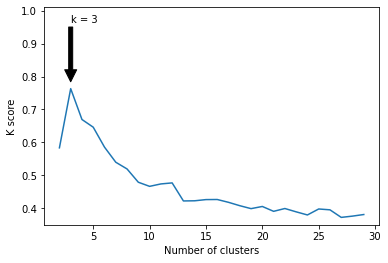

k = 3 | score =  0.7632728068061329


In [59]:
plt.plot(k_list, k_score)
plt.xlabel('Number of clusters')
plt.ylabel('K score')

y_max = max(k_score)
x_pos = k_score.index(y_max)
x_max = k_list[x_pos]

plt.annotate('k = '+ str(x_max), xy=(x_max, y_max+0.02), xytext=(x_max, y_max+0.2),
            arrowprops=dict(facecolor='black', shrink=0.005),)

plt.ylim(0.35,1.01)
plt.show()

print('k =', x_max, '| score = ', y_max)

# Visualize clusters

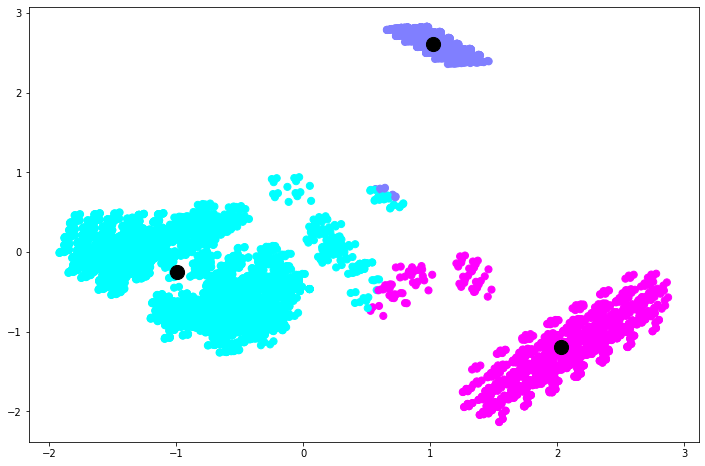

In [73]:
k_means = KMeans(n_clusters=x_max)
y = k_means.fit_predict(X)

plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)
